<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-LCC/blob/main/Notebooks/02-Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Preprocesamiento de Texto</h1>

En esta notebook visualizaremos algunos conceptos del preprocesamiento de texto, particularmente:

* Tokenización
* Stemming
* Named Entity Recognition
* POS Tagging

Para esto, estudiaremos algunos ejemplos que serán procesados por las clases del módulo [spaCy](https://spacy.io/). No es una guía minuciosa del uso de este módulo, son solamente algunos ejemplos ilustrativos.

Verificar que la versión de spaCy sea la 3.*

In [ ]:
!python -m spacy info

In [ ]:
 import spacy

Ya que hemos importado spaCy, necesitamos cargar un modelo estadístico de lenguaje. SpaCy ofrece una variedad de modelos para diferentes idiomas. Estos modelos ayudan con la tokenization, etiquetado PoS (part-of-speech), NER (named entity recognition) y más.

Bajamos y cargamos el modelo estadístico de lenguaje **en_core_web_sm**, es el modelo más pequeño en inglés de spaCy y un buen punto de partida.

Documentación del modelo: https://spacy.io/models/en#en_core_web_sm<br>
Modelos disponibles: https://spacy.io/models<br>
Uso de los modelos: https://spacy.io/usage/models

🔵 Información adicional del modelo

**en_core_web_sm** fué entrenado en el corpus OntoNotes 5, el cual es un corpus anotado que contiene noticias, blogs, transcripciones, etc. Los documentos del corpus están anotados con información de como cada oración debería *parsearse* (parsing), part-of-speech de cada palabra, si cada palabra es una *named entity*, entre otras cosas.

https://catalog.ldc.upenn.edu/LDC2013T19



En principio no hay necesidad de bajarlo, observar en la información del modulo que ya está disponible.

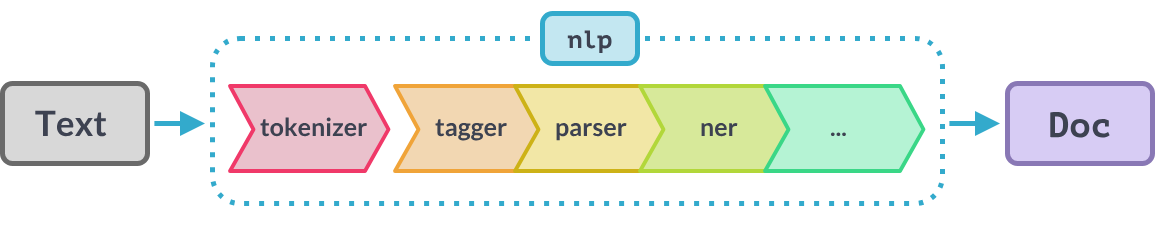

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load('en_core_web_sm')

Ya hemos cargado el modelo, la variable `nlp` hace referencia a una instancia de la clase [`Language`](https://spacy.io/api/language) que contiene metodos para varias tareas (tokenización, etc.) y un pipeline de procesamiento.

Usaremos este modelo de lenguaje para realizar algunas tareas de preprocesamiento de PLN.


In [ ]:
type(nlp)

# Tokenización


Al pasar cualquier texto a la instancia `nlp` obtenemos un objeto [`Doc`](https://spacy.io/api/doc) que contiene el texto tokenizado e información adicional para cada [token](https://spacy.io/api/token).

In [ ]:
# Sample sentence.
text = "He didn't want to pay $20 for this book."
doc = nlp(text)
print(doc,'\n',type(doc))

Veamos los tokens

In [ ]:
print([t.text for t in doc])

Observar que:
- "didn't" se separa en "did" y "n't".
- El símbolo de moneda y el número están separados.
- El punto final es también un token.

Si tokenizaramos sólo considerando los espacios en blanco:

In [ ]:
text.split()

El objeto `Doc` puede ser indexado y *sliced* como si fuera una lista:

In [ ]:
print(doc[0])
print(type(doc[0]))

In [ ]:
print(doc[:3])
print(doc[-5:])

Podemos recuperar el texto original:

In [ ]:
print(doc.text)

Podemos tokenizar multiples oraciones y accesar a ellas individualmente usando la propiedad `sents` del objeto `Doc`.

In [ ]:
s = """Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next. First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc_2 = nlp(s)

for j,sent in enumerate(doc_2.sents):
    print(f"Oración {j}:\n{sent}\n")


In [ ]:
print([token.text for token in doc_2])

Algunos casos de errores en la tokenización: https://github.com/explosion/spaCy/issues/3052



In [ ]:
texto = '''El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ciudad de Nueva York por detrás de One World Trade Center y Central Park Tower.'''

In [ ]:
nlp = spacy.load("es_core_news_sm")

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
import spacy

nlp_sp = spacy.load("es_core_news_sm")

In [ ]:
doc_sp = nlp_sp(texto)

In [ ]:
tokens = [token.text for token in doc_sp]
for token in doc_sp:
  print(token.text)

# Reconocimiento de entidades nombradas (NER)

Podemos buscar entidades nombradas en el texto usando las anotaciones de los tokens

In [ ]:
entities = list(doc.ents)

print(entities)
print(entities[0].label_)

In [ ]:
doc_3 = nlp('''I have $20 worth of things to buy in New York city,
I can afford more things in Mexico or Latin America, certainly not the Starry Night painting though.
Lastly, I think I met Zeus at a McKenzie group consulting meeting in NYC last summer.''')

[(x,x.label_) for x in list(doc_3.ents)]

Observa que el NER no agrupa tokens juntos, estas agrupaciones se hacen de forma separada en el atributo `ents`.

In [ ]:
[x.text for x in doc_3]

Algunas etiquetas de las entidades son:

* PERSON People, including fictional
* NORP Nationalities or religious or political groups
* FACILITY Buildings, airports, highways, bridges, etc.
* ORGANIZATION Companies, agencies, institutions, etc.
* GPE Countries, cities, states
* LOCATION Non-GPE locations, mountain ranges, bodies of water
* PRODUCT Vehicles, weapons, foods, etc. (Not services)
* EVENT Named hurricanes, battles, wars, sports events, etc.
* WORK OF ART Titles of books, songs, etc.
* LAW Named documents made into laws
* LANGUAGE Any named language

In [ ]:
spacy.explain('GPE')

Spacy cuenta con algunos visualizadores para NER y otras tareas.

https://spacy.io/usage/visualizers

In [ ]:
from spacy import displacy

displacy.render(doc_3, style='ent', jupyter=True)

Podemos obtener, además, los índices de cada entidad en el texto original.

In [ ]:
print([(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc_3.ents])

Para corpus domain-specific, un etiquetador NER puede ser afinado. En este ejemplo sería bueno que _The Martian_ fuera etiquetado como "FILM".

🔵 Esto puede aparecer más adelante en los ejercicios y en el curso.

In [ ]:
s = "Ridley Scott directed The Martian."
doc = nlp(s)
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
spacy.explain('NORP')

In [ ]:
print([(ent.text, ent.label_) for ent in doc_sp.ents])

In [ ]:
from spacy import displacy

displacy.render(doc_sp, style='ent', jupyter=True)

## Ejercicios



### 1. Exploración descriptiva de documentos mediante tokenización

En este primer ejemplo describiremos el contenido de varios documentos que tratan sobre baseball. Exploraremos los términos más frecuentes mediante la construcción de una nube de palabras. Haremos el ejercicios usando, y sin usar, tokenización.

In [ ]:
!pip install -qq wordcloud

In [ ]:
from sklearn.datasets import fetch_20newsgroups

docs_newsgroups = fetch_20newsgroups(subset='train',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=['rec.sport.baseball']
                                     )

lista_docs_20ng = docs_newsgroups.data
print(f"{len(lista_docs_20ng)} documentos")

Sin tokenizar:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_docs_20ng))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizando:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_spacy = nlp(" ".join(lista_docs_20ng))
lista_tokens = [t.text for t in docs_spacy]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizar y quitar palabras *problemáticas* (stop-words):

In [ ]:
from collections import Counter

dict(sorted(Counter(lista_tokens).items(), key=lambda x: x[1], reverse=True))

In [ ]:
lista_tokens = [t.text for t in docs_spacy
                if t.text not in ["n't","."," ","'s","_","\n"]]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

### Imprime una lista de todas las entidades nombradas que aparecen en estos documentos

Al ser de baseball podrían aparecer nombres de jugadores y equipos, ¿el NER los atrapa?

# Atributos adicionales de los tokens


spaCy realiza un pipeline de preprocesamiento (excepto el stemming) de forma *oculta*. De acuerdo con su política no destructiva, los tokens no se modifican directamente. Más bien, cada objeto **Token** tiene una serie de atributos que pueden ayudarle a obtener versiones del documento con ciertos pasos de preprocesamiento aplicados. Los atributos que tiene un **Token** se pueden encontrar aquí:<br>
https://spacy.io/api/token#attributes
<br><br>
More information about spaCy's processing pipeline:<br>
https://spacy.io/usage/processing-pipelines

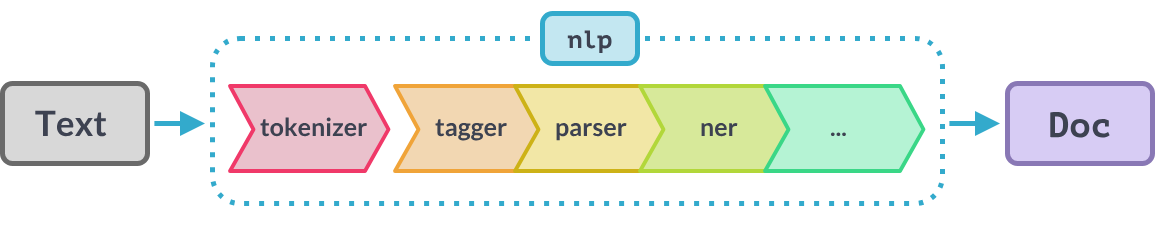

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "Scientists have developed a new, more energy-efficient way for AI algorithms to process data. His model may become the basis for a new generation of AI that learns like we do."
doc = nlp(s)

Probemos algunos atributos de algunos tokens

In [ ]:
doc[0].ent_id_, doc[0].lemma_

## Mayúsculas/Minúsculas

Podemos escribir los tokens en minúsculas:

In [ ]:
print([t.lower_ for t in doc])

Esto nos da flexibilidad para realizar otras tareas, como no cambiar a minúscula si es el inicio de una oración.

In [ ]:
print([t.lower_ if not t.is_sent_start else t for t in doc])

# Stop Word Removal

Las stop words son palabras de una lista (stoplist) que se filtran antes o después del procesamiento de texto ya que se consideran insignificantes.

spaCy incluye una lista por default de stop words. Observa que cada token viene anotado con el atributo `is_stop`.

In [ ]:
print([t for t in doc if not t.is_stop])

Pdemos ver todas las stopwords. Podemos recuperarlas desde el módulo de spacy, o desde el modelo de lenguaje.

In [ ]:
from spacy.lang.en import stop_words

# --- Manera 1
stop_words = stop_words.STOP_WORDS
print(stop_words)

# --- Manera 2
stop_words_model = nlp.Defaults.stop_words
print(stop_words_model)
print(len(nlp.Defaults.stop_words))

Exploremos los signos de puntuación:

In [ ]:
from string import punctuation

punctuations = list(punctuation)
print(punctuations)
print(len(punctuations))

In [ ]:
from spacy.lang.es import stop_words

STOP_WORD_sp = stop_words.STOP_WORDS
print(STOP_WORD_sp)
print(len(STOP_WORD_sp))

In [ ]:
'unos' in STOP_WORD_sp

Además de quitar stop words también podemos quitar los signos de puntuación. Comparemos la versión inicial y esta versión *limpia*.

In [ ]:
print(s)
clean = [t.text for t in doc if not t.is_stop and t.text not in punctuations]
print(" ".join(clean))

## Stopwords con NLTK

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))
print(len(stopwords.words('english')))

Veamos en qué palabras coinciden ambas listados de stopwords.

In [ ]:
from spacy.lang.en import stop_words
from nltk.corpus import stopwords

stop_words_spacy = stop_words.STOP_WORDS
stop_words_nltk = stopwords.words('english')

print(f"Spacy: {len(stop_words_spacy)}")
print(f"NLTK: {len(stop_words_nltk)}")

coincidencias = list(set(stop_words_spacy).intersection(set(stop_words_nltk)))
print(f"Intersección: {len(coincidencias)}")
print(coincidencias)

# Lematización

La **lematización** es el proceso de reducir una palabra a su forma base (lema). Se utiliza para:

* Reducir la dimensionalidad del espacio de características, al mapear palabras relacionadas a un solo lema.
* Mejorar la precisión de los modelos de lenguaje, al tratar palabras con el mismo significado como una sola entidad.
* Facilitar la comparación y el análisis de textos, al estandarizar la forma de las palabras.

In [ ]:
[(t.text, t.lemma_) for t in doc]

Veamos los que cambiaron:

In [ ]:
[(t.text, t.lemma_) for t in doc if t.text != t.lemma_]

# Etiquetado Part-of-Speech


spaCy realiza, como parte de su pipeline, el etiquetado Part-of-Speech (POS).

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)

Las etiquetas POS se pueden ver en el atributo `pos_`

In [ ]:
[(t.text, t.pos_) for t in doc]

Con `spacy.explain` podemos obtener una descripción de las abreviaturas.

In [ ]:
spacy.explain('PROPN')

Contemos cada POS diferente

In [ ]:
from collections import Counter

Counter([t.pos_ for t in doc])

## Ejemplo en español

In [ ]:
texto

In [ ]:
for token in nlp_sp(texto):
  print(f"{token.text}\t{token.pos_}\t{token.ent_type_}")

# Parsing

SpaCy también realiza el parsing como parte de su pipeline. Visualicemos un ejemplo.

In [ ]:
s = "She enrolled in the course at the university."
doc = nlp(s)

displacy.render(doc, style='dep', jupyter=True)

Para cada par de dependencias, spaCy muestra el nodo *hijo* (hacia donde apunta la flecha), el nodo *padre* (desde donde se apunta) y su relación (la etiqueta sobre la flecha).

Más información: https://spacy.io/api/annotation#dependency-parsing

Como siempre, podemos ver más detalles con `spacy.explain`.

In [ ]:
print(spacy.explain('nsubj'))
print(spacy.explain('dobj'))
print(spacy.explain('prep'))

Podemos acceder a las etiquetas de dependenciaa través del atributo `dep_`.

In [ ]:
[(t.text, t.dep_) for t in doc]

Observa que 'enrolled' es el _ROOT_. A continuación podemos darnos una idea de cómo ocurre el etiquetado en el pipeline.


In [ ]:
[(t.text, t.dep_, t.head.text) for t in doc]

## Ejemplo en español

In [ ]:
texto_2 = "La nube de Oort es una nube esférica de objetos transneptunianos"

displacy.render(nlp_sp(texto_2), style='dep', jupyter=True)

# ⭕ Ejercicio en clase

1. Escoge un parrafo(s) de un artículo de wikipedia en inglés (al menos 15 líneas). Realiza las siguientes tareas:
 * Quita todas las citas de la forma [1], [2], etc. Usa expresiones regulares.
 * Quita todos los saltos de línea. Usa expresiones regulares.
 * Quita todo el texto entre comillas, paréntesis. Usa expresiones regulares.
 * Tokeniza el texto y desecha los signos de puntuación.
 * Forma una nueva string juntando los tokens que obtuviste en el paso anterior, los tokens deben estar lematizados y en minúscula.
 * Imprime el texto original y el texto *limpio* que obtuviste para que los compares.

Puedes usar el link https://en.wikipedia.org/wiki/Special:Random.

2. Con el mismo texto del punto anterior...




# ⭕ Tarea 2

Usando los tokenizadores mencionados arriba, ¿la tokenización separa prefijos? Prueba en español e inglés.


Repite la nube de palabras con los documentos del 20newsgroups

Produciremos nubes de palabras secuenciales:

* Sin quitar stopwords ni signos de puntuación, como viene el texto.
* Quitando stopwords y signos de puntuación.
* Quitando stopwords y puntuación, además aplicando lematización.
* Quitando stopwords y puntuación, además aplicando stemming (spacy no lo soporta nativamente, busca opciones en NLTK).

¿Cuál consideras que captura de manera más clara la temática de los documentos?

### Repite la estrategia que hayas escogido como la mejor para analizar ahora otro conjunto de documentos.

Escoge documentos de otro tema del mismo corpus 20newsgroups. Aplica la misma estrategia anterior para producir dos nubes de palabras.


# Referencias Adicionales

* Curso [spaCy 101: Everything you need to know](https://spacy.io/usage/spacy-101).
* [NLTK](https://www.nltk.org/) (**N**atural **L**anguage **T**ool**K**it) es otro módulo para tareas de NLP.  Contiene, por ejemplo, los tokenizadores `TreebankWordTokenizer` y `word_tokenize`.
* [Core-NLP](https://stanfordnlp.github.io/CoreNLP/) es una suite para tareas de NLP, está escrita en Java, por lo que no se puede usar directamente en Python. Puedes usar el [demo online](https://corenlp.run/).